In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Position_Salaries.csv")

In [3]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
X = df.iloc[:,1:2].values
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [5]:
y = df.Salary.values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [6]:
X.shape

(10, 1)

In [7]:
y.shape

(10,)

Text(0, 0.5, 'y dataset')

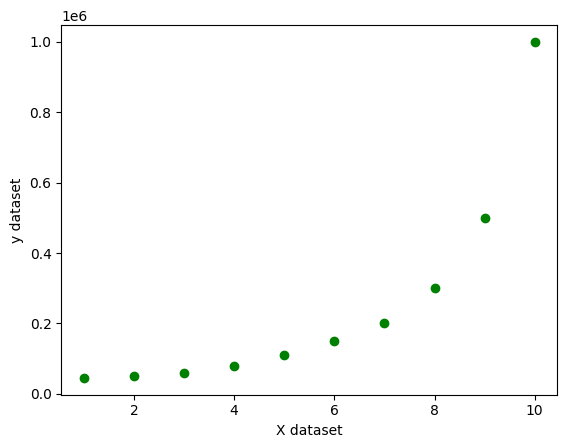

In [8]:
plt.scatter(X,y,color='g')
plt.xlabel('X dataset')
plt.ylabel("y dataset")

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression
regression1 = LinearRegression()

In [11]:
regression1.fit(X_train,y_train)

LinearRegression()

In [12]:
from sklearn.metrics import r2_score
score = r2_score(y_test,regression1.predict(X_test))
print(score)

0.8451346684575974


Text(0, 0.5, 'y data')

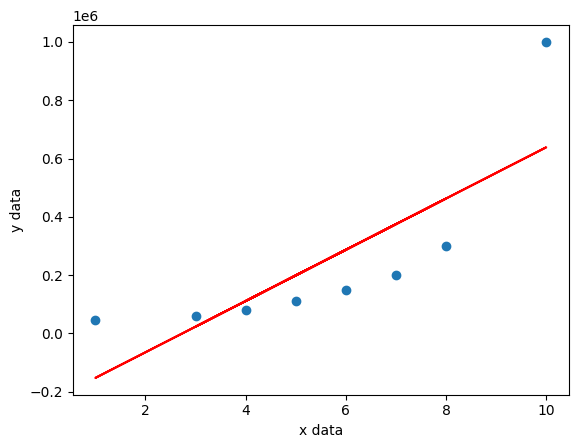

In [13]:
plt.plot(X_train, regression1.predict(X_train),color='r')
plt.scatter(X_train,y_train)
plt.xlabel('x data')
plt.ylabel('y data')


In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5,include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [15]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)

In [16]:
score = r2_score(y_test,y_pred)
print(score)

0.9950481764354403


In [17]:
print(regression.coef_)

[     0.         116355.39327679 -72923.53182458  21032.7117136
  -2643.13637701    125.44408403]


In [18]:
print(regression.intercept_)

-16948.024657542963


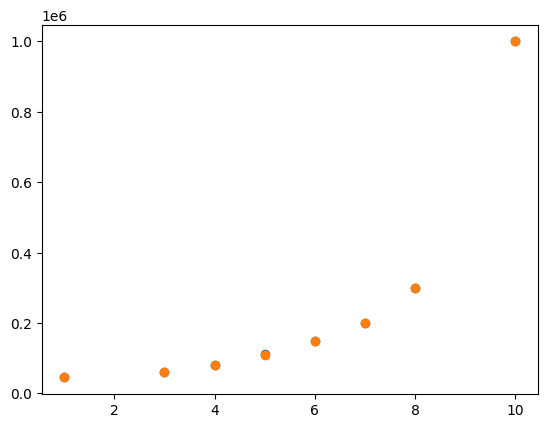

In [19]:
plt.scatter(X_train,regression.predict(X_train_poly))
plt.scatter(X_train,y_train)

In [20]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2 = r2_score(y_test,y_pred)
print(r2)
mae = mean_absolute_error(y_test,y_pred)
print(mae)
mse = mean_squared_error(y_test,y_pred)
print(mse)
rmse = np.sqrt(mse)
print(rmse)

0.9950481764354403
13037.790698075274
250686067.95583352
15833.068810430703
